## Mood classfication using CNN (HAPPY / SAD)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Thu Nov  7 15:01:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [119]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [120]:
img = image.load_img(r"D:\pictures\testing\IMG_1691.JPG")

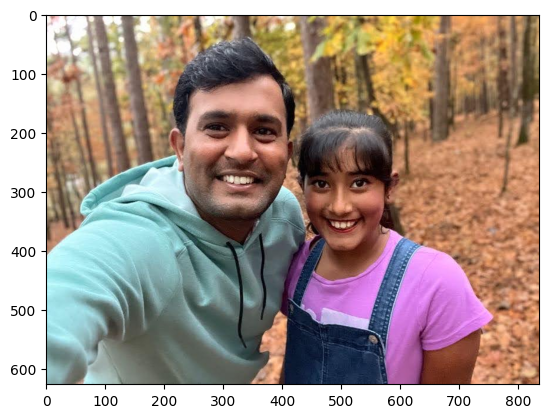

In [92]:
plt.imshow(img)


In [121]:
i1 = cv2.imread(r"D:\pictures\testing\IMG_1691.JPG")
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255

array([[[255, 250, 255],
        [255, 251, 255],
        [253, 249, 255],
        ...,
        [ 94, 130, 148],
        [ 93, 129, 147],
        [ 91, 127, 145]],

       [[255, 251, 255],
        [254, 251, 255],
        [250, 246, 255],
        ...,
        [ 91, 127, 145],
        [ 90, 125, 145],
        [ 89, 125, 143]],

       [[255, 252, 255],
        [254, 252, 255],
        [248, 245, 254],
        ...,
        [ 88, 125, 145],
        [ 89, 126, 148],
        [ 89, 126, 146]],

       ...,

       [[179, 175, 140],
        [179, 175, 140],
        [179, 175, 140],
        ...,
        [ 93, 129, 189],
        [ 99, 134, 197],
        [104, 140, 200]],

       [[179, 174, 141],
        [179, 174, 141],
        [179, 174, 141],
        ...,
        [ 93, 129, 189],
        [ 99, 135, 195],
        [104, 140, 200]],

       [[179, 174, 141],
        [179, 174, 141],
        [179, 174, 141],
        ...,
        [ 93, 129, 189],
        [ 99, 135, 195],
        [104, 140, 200]]

In [94]:
i1.shape

(627, 836, 3)

In [122]:
# Display the array to confirm it's loaded
print(i1)

# Check the shape to confirm the 3D structure (height, width, channels)
if i1 is not None:
    print("Image shape:", i1.shape)
else:
    print("Image could not be loaded. Please check the file path.")

[[[255 250 255]
  [255 251 255]
  [253 249 255]
  ...
  [ 94 130 148]
  [ 93 129 147]
  [ 91 127 145]]

 [[255 251 255]
  [254 251 255]
  [250 246 255]
  ...
  [ 91 127 145]
  [ 90 125 145]
  [ 89 125 143]]

 [[255 252 255]
  [254 252 255]
  [248 245 254]
  ...
  [ 88 125 145]
  [ 89 126 148]
  [ 89 126 146]]

 ...

 [[179 175 140]
  [179 175 140]
  [179 175 140]
  ...
  [ 93 129 189]
  [ 99 134 197]
  [104 140 200]]

 [[179 174 141]
  [179 174 141]
  [179 174 141]
  ...
  [ 93 129 189]
  [ 99 135 195]
  [104 140 200]]

 [[179 174 141]
  [179 174 141]
  [179 174 141]
  ...
  [ 93 129 189]
  [ 99 135 195]
  [104 140 200]]]
Image shape: (627, 836, 3)


In [123]:
train = ImageDataGenerator(rescale = 1/200)
validataion = ImageDataGenerator(rescale = 1/200)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [124]:
train_dataset = train.flow_from_directory(r"D:\pictures\training",
                                         target_size = (200,200),
                                         batch_size = 20,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'D:\pictures\validation',
                                          target_size = (200,200),
                                          batch_size = 20,
                                          class_mode = 'binary')

Found 13 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [125]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [126]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [127]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [128]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [129]:
model_fit = model.fit(train_dataset,epochs = 20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4615 - loss: 0.7132
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5385 - loss: 25.4996
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.4615 - loss: 7.1836
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.4615 - loss: 0.9424
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5385 - loss: 1.3527
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.4615 - loss: 0.7688
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.6154 - loss: 0.5999
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 1.0000 - loss: 0.5205
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.7692 - loss: 0.4570
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.4615 - loss: 1.4438
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.5385 - loss: 0.5926
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 1.0000 - loss

In [130]:
dir_path = r"D:\pictures\testing"
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

child.swing_.smile_.jpg
happy2.jpeg
happy3.jpeg
imag4.jpg
imag5.jpg
img.jpg
img1.jpg
img3.jpg
IMG_1535.JPG
IMG_1536.JPG
IMG_1691.JPG
IMG_1715.JPG
sad1.jpeg


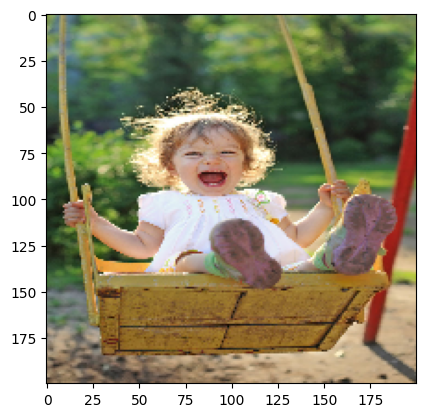

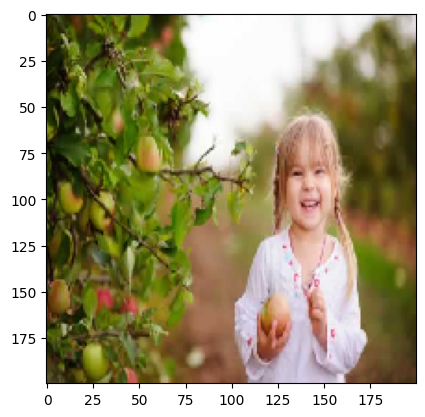

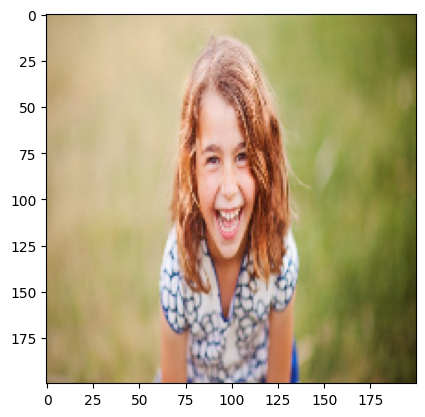

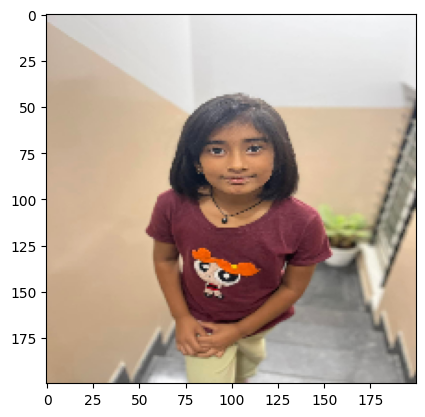

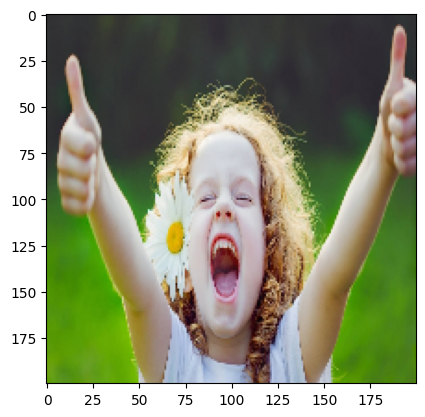

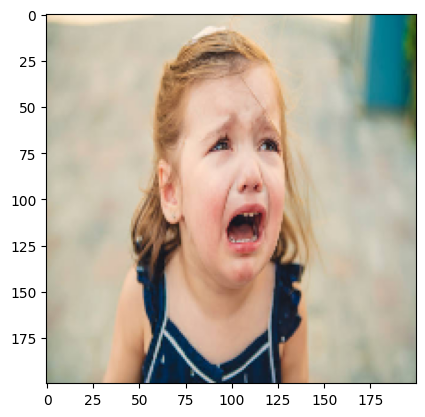

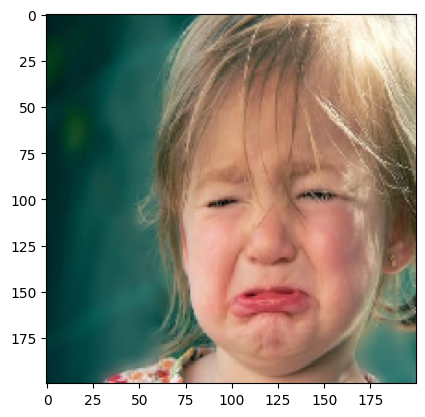

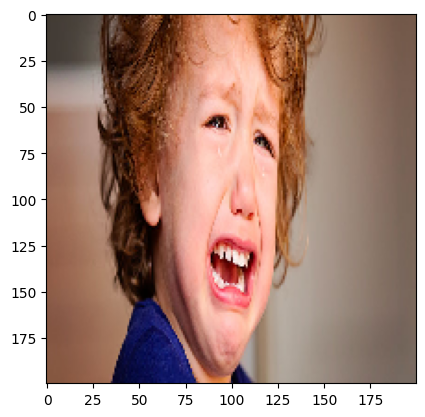

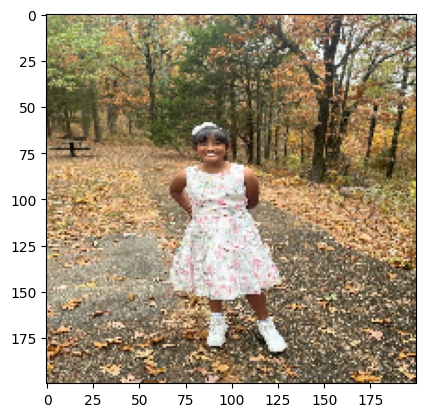

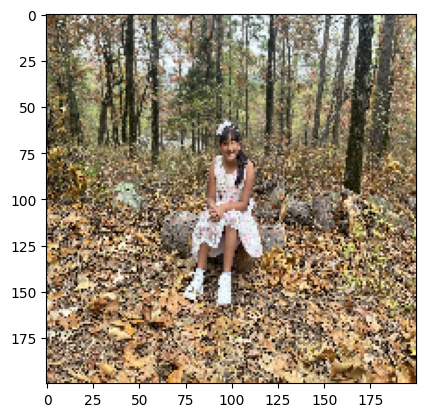

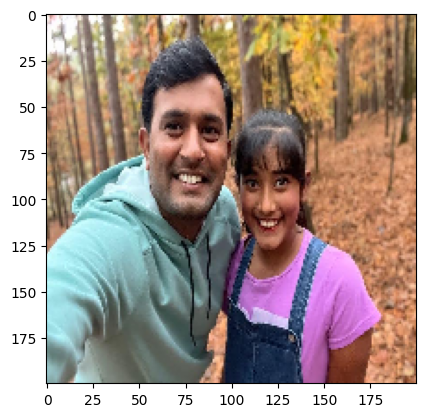

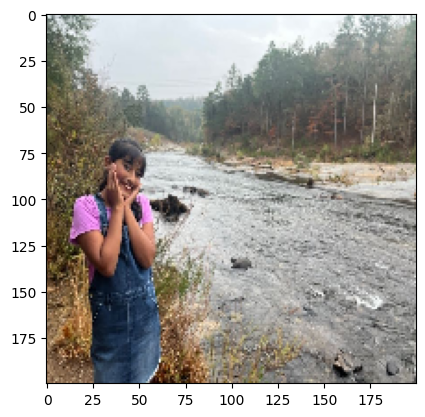

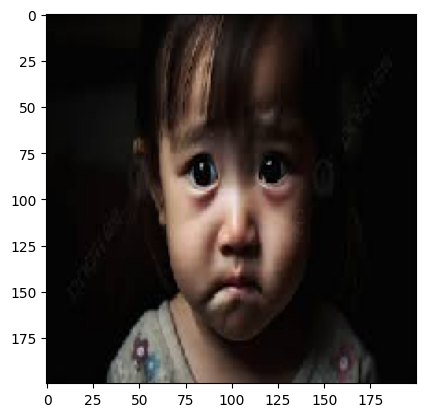

In [131]:
dir_path = r"D:\pictures\testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

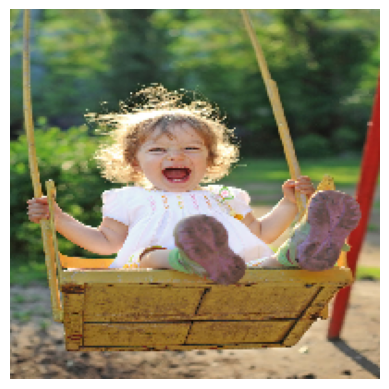

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
i am happy


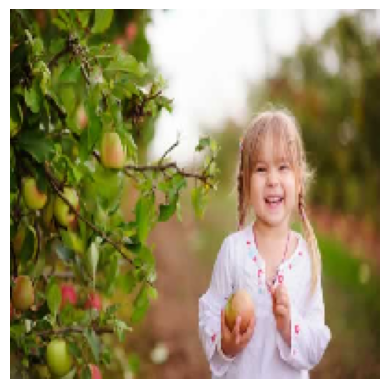

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
i am happy


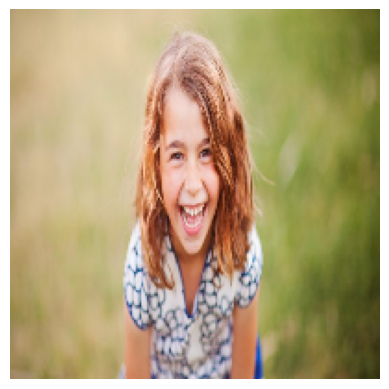

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
i am happy


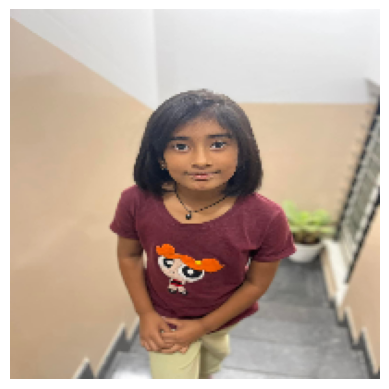

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
i am happy


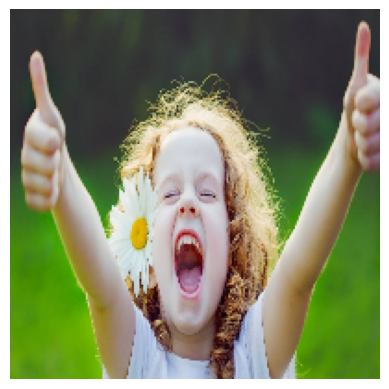

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
i am happy


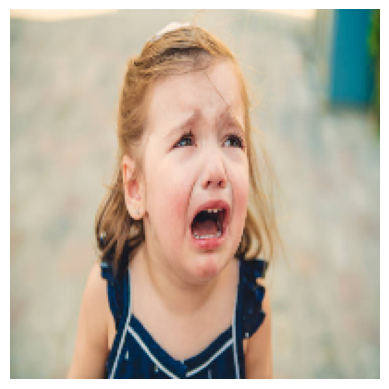

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
i am happy


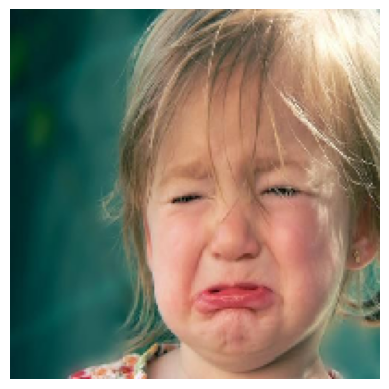

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
i am happy


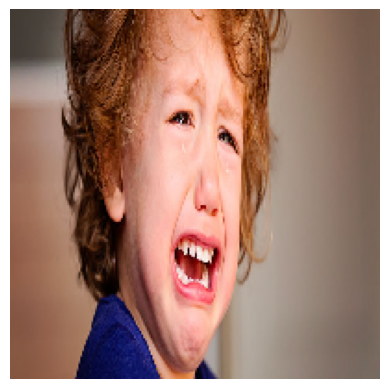

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
i am not happy


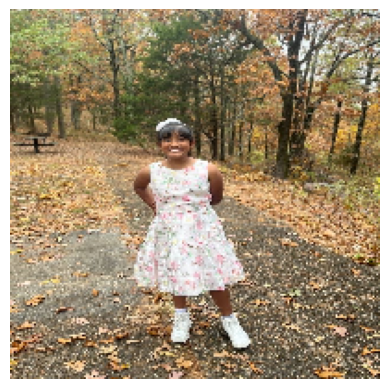

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
i am happy


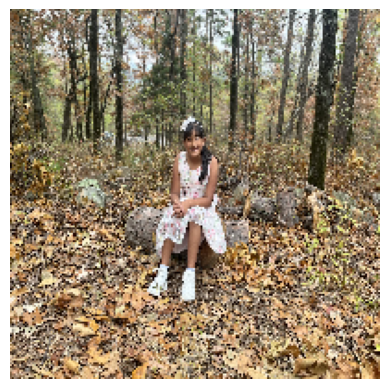

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
i am happy


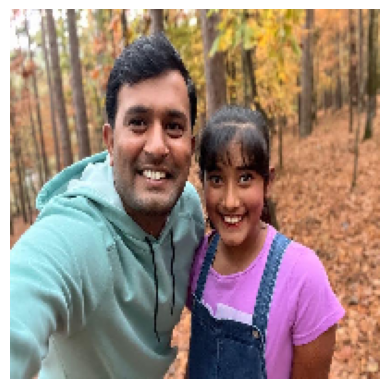

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
i am happy


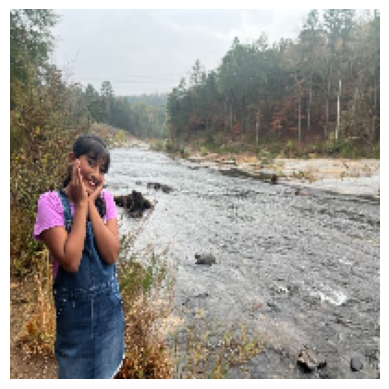

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
i am happy


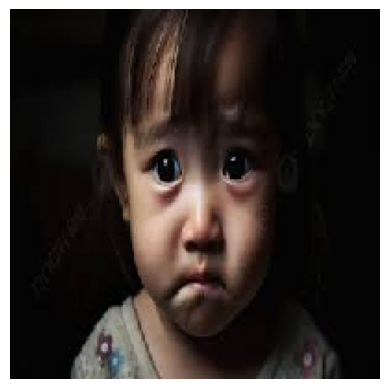

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
i am not happy


In [132]:
# Directory path containing the images
dir_path = r"D:\pictures\testing"
for i in os.listdir(dir_path):
    # Construct the image path and load the image
    img_path = os.path.join(dir_path, i)
    img = image.load_img(img_path, target_size=(200, 200))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Optional: hide axes
    plt.show()

    x= image.img_to_array(img) / 255.0
    x=np.expand_dims(x,axis = 0)
    images = np.hstack([x])

    val = model.predict(images)
    
    if val<0.5:
        print( 'i am happy')
    else:
        print('i am not happy')

In [117]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [133]:
model.save('model.h5')

In [134]:
import os
os.getcwd()

'C:\\Users\\laksh\\Python_Basics\\CNN\\Mood_Classification'